> "You can think of solving MNIST as the ``Hello world'' of deep learning." - François Chollet

The MNIST dataset consists of a collection of 70,000 images of handwritten numerical digits. Each image consists of a 28x28 pixel grayscale image.

The cell below displays 10 randomly selected images out of the training dataset.

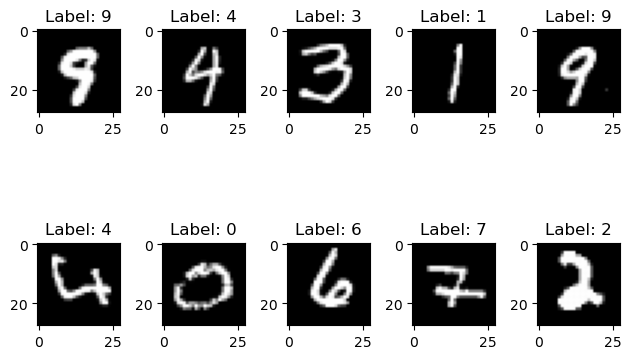

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Select a random sample of images
num_samples = 10
random_indices = np.random.choice(len(train_images), num_samples)

# Plot the random samples
for i, idx in enumerate(random_indices):
  plt.subplot(2, 5, i+1)
  plt.imshow(train_images[idx], cmap='gray')
  plt.title(f"Label: {train_labels[idx]}")
plt.tight_layout()
plt.show()

We can verify as follows that each image is simply a 2d numpy array, with grayscale intensity in the range 0 to 255.

In [36]:
example_image = train_images[random_indices[0]]  
print(    
    type(example_image),
    example_image,
    f"Number of Train images: {len(train_images)}",
    f"Number of Test images: {len(test_images)}",
    sep='\n'
)


<class 'numpy.ndarray'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  97 125 125 125 192
  109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 101 158 249 253 254 254 255 254
  254 156   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  4

# Defining the Network Architecture

In [37]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])

## The Compilation Step

In [38]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## Preparing the Training Data

The reshape we are doing can be represented as: 60000, 28, 28 - > 60000, 28*28

In [39]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

## Fitting the Model

In [40]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


469/469 [==============================] - 8s 16ms/step - loss: 0.2636 - accuracy: 0.9240
Epoch 2/5
469/469 [==============================] - 8s 16ms/step - loss: 0.1061 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 8s 16ms/step - loss: 0.0701 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 7s 16ms/step - loss: 0.0518 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0372 - accuracy: 0.9893


In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Making Predictions on the Test Set

Each number of index `i` in that array corresponds to the probability that digit image `test_digits[0]` belongs to class `i`.

In [42]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 86ms/step


array([1.4951320e-08, 3.5552446e-11, 5.5791634e-07, 2.5189181e-06,
       1.9958906e-11, 2.8080601e-08, 2.0389452e-13, 9.9999678e-01,
       1.6153409e-08, 1.5162203e-07], dtype=float32)

## Evaluating the Model on the Test Set

In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print (f"test_acc: {test_acc}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0623 - accuracy: 0.9806
test_acc: 0.9805999994277954


The test-set accuracy turns out to be 98.0% - that's quite a bit lower than the training-set accuracy (98.9%). This gap between training accuracy and test accuracy is an example of overfitting: the fact that machine learning models tend to perform worse
on new data than on their training data. Overfitting is a central topic in chapter 3.

Let's plot some images from the test set along with the predictions by the model:

1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 35ms/step


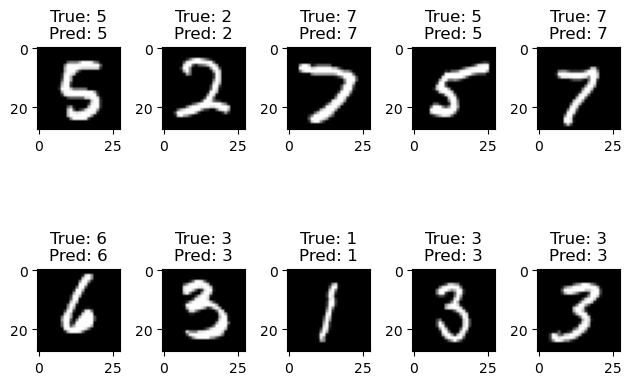

In [44]:
# Select a random sample of images
num_samples = 10
random_indices = np.random.choice(len(test_images), num_samples)

# Plot the random samples with their predicted labels
for i, idx in enumerate(random_indices):
    test_prediction = model.predict(test_images[idx:idx+1])
    predicted_label = np.argmax(test_prediction, axis=1)
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {test_labels[idx]}\nPred: {predicted_label[0]}")
plt.tight_layout()
plt.show()